##### Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Exercise_5 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output
 3. You can zip these 2 files if you like; use the same naming convention for the zip file.


# Objectives:

In this exercise, you will:

 - Construct hierarchical indexes
 - Select and group data to create pivot-tables

Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


# Specifications and Requirements


We're going to use the XYZ data again  to construct hierarchical indexes and select, modify, group, and reshape data in a wide variety of ways.  The data we want here, which we'll call xyzcustnew, are as follows:

In [1]:

import pandas as pd  # panda's nickname is pd
import numpy as np  # numpy as np
from pandas import DataFrame, Series, Categorical 
from sqlalchemy import create_engine

import matplotlib

%matplotlib inline

In [2]:
engine=create_engine('sqlite:///xyz.db')	    # the db is in my current working directory

In [3]:
# .info gives same feedback as .dtype and .count
xyzcustnew=pd.read_sql_table('xyzcust',engine)
xyzcustnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 11 columns):
index                    30179 non-null int64
ACCTNO                   30179 non-null object
ZIP                      30179 non-null int64
ZIP4                     30179 non-null int64
LTD_SALES                30179 non-null float64
LTD_TRANSACTIONS         30179 non-null int64
YTD_SALES_2009           30179 non-null float64
YTD_TRANSACTIONS_2009    30179 non-null int64
CHANNEL_ACQUISITION      30179 non-null object
BUYER_STATUS             30179 non-null object
ZIP9_SUPERCODE           30179 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


In [4]:
# heavyCut is a constant and was decided as where the data 
# should be cut
heavyCut= 423  

In [5]:
# look at characteristics 
xyzcustnew['YTD_SALES_2009'].describe()

count     30179.000000
mean        236.283972
std        2117.042293
min           0.000000
25%           0.000000
50%           0.000000
75%         207.000000
max      351000.000000
Name: YTD_SALES_2009, dtype: float64

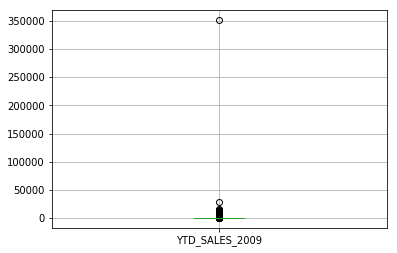

In [6]:
# look at spread of 2009 sales
xyzcustnew.boxplot(column='YTD_SALES_2009')

In [7]:
# create a categorial variable of either a 1 or 0 based upon the value of heavyCut
# YTD_SALES_2009 greater than the heavyCut value will be assigned a 1
heavyCat=Categorical(np.where(xyzcustnew.YTD_SALES_2009>heavyCut,1,0))
heavyCat.describe()

,counts,freqs
categories,,
0,25795,0.854733
1,4384,0.145267


In [8]:
# be more descriptive than a 1 or a 0
heavyCat.rename_categories(['regular','heavy'],inplace=True)
heavyCat.describe()

,counts,freqs
categories,,
regular,25795,0.854733
heavy,4384,0.145267


In [9]:
# look at the first ten records
heavyCat[:10]

[regular, heavy, regular, regular, regular, regular, heavy, regular, regular, regular]
Categories (2, object): [regular, heavy]

In [10]:
# create a new column with this variable
xyzcustnew['heavyCat']=heavyCat

In [11]:
# a dummy variable marks the field as either 1 or 0
buyerType=pd.get_dummies(heavyCat)
buyerType[:3]

,regular,heavy
0,1,0
1,0,1
2,1,0


In [12]:
# create new columns
xyzcustnew['typeReg']=buyerType['regular']
xyzcustnew['typeHeavy']=buyerType['heavy']


In [13]:
xyzcustnew.columns

Index(['index', 'ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE', 'heavyCat', 'typeReg', 'typeHeavy'],
      dtype='object')

In [14]:
# look at new variables
xyzcustnew.head()

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE,heavyCat,typeReg,typeHeavy
0,0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,regular,1,0
1,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,heavy,0,1
2,2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,regular,1,0
3,3,PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838,regular,1,0
4,4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,regular,1,0


In [15]:
# for this exercises we need to create trCountsChrono object  

xyztrans=pd.read_sql('xyztrans', engine)

trandate=xyztrans.TRANDATE	# should be a Series

daystr=trandate.str[0:2]		# two digit date numbers slice

mostr=trandate.str[2:5]		# the three letter month abbreviations

yearstr=trandate.str[5:]		# four digit years

print(daystr[0],mostr[0],yearstr[0],xyztrans.TRANDATE[0])

09 JUN 2009 09JUN2009


In [16]:
#create a dictionary for the months
monums={'JAN':'1', 'FEB':'2', 'MAR':'3', 'APR':'4', 'MAY':'5', 'JUN':'6', 
        'JUL':'7', 'AUG':'8', 'SEP':'9', 'OCT':'10', 'NOV':'11','DEC':'12'}
#month
monos=mostr.map(monums)	# do a dict lookup for each value of mostr

transtr=yearstr+'-'+monos+'-'+daystr
print(transtr[0])

2009-6-09


In [17]:
# convert to datetime values
trDateTime=pd.to_datetime(transtr)

In [18]:

trCounts=trDateTime.value_counts()
trCounts

2009-12-19    877
2009-12-21    836
2009-12-12    782
2009-12-23    765
2009-12-20    744
2009-12-22    717
2009-12-18    708
2009-12-14    615
2009-12-15    599
2009-12-16    571
2009-12-11    568
2009-11-21    561
2009-12-13    542
2009-11-22    507
2009-12-10    504
2009-12-04    488
2009-11-25    451
2009-12-24    425
2009-11-23    421
2009-11-27    419
2009-11-24    412
2009-04-10    404
2009-11-28    402
2009-11-14    402
2009-12-09    401
2009-05-09    398
2009-12-08    397
2009-11-07    394
2009-12-07    372
2009-01-17    372
             ... 
2009-02-26     47
2009-04-30     47
2009-02-21     39
2009-03-01     36
2009-03-10     33
2009-06-14     29
2009-11-26     26
2009-03-16     24
2009-07-14     24
2009-06-15     24
2009-08-30     23
2009-11-04     23
2009-02-25     22
2009-02-02     22
2009-10-17     21
2009-03-08     20
2009-03-27     19
2009-02-03     19
2009-02-01     18
2009-03-11     17
2009-02-07     16
2009-07-02     15
2009-06-13     14
2009-07-16     14
2009-12-25

In [19]:
newIndex=pd.date_range(trCounts.index.min(),trCounts.index.max())

trCountsChrono=trCounts.reindex(index=newIndex)


In [20]:
print(trCountsChrono.head())

2009-01-01    176
2009-01-02    305
2009-01-03    365
2009-01-04    231
2009-01-05    144
Freq: D, Name: TRANDATE, dtype: int64


In [21]:
# initialize a dataframe
trDF=DataFrame()                

In [22]:
trDF

""


In [23]:
# load dataframe with 2 columns
trDF['date'] = trCountsChrono.index
trDF['transactions'] = trCountsChrono.values
trDF.columns

Index(['date', 'transactions'], dtype='object')

In [24]:
trDF.head()

,date,transactions
0,2009-01-01,176
1,2009-01-02,305
2,2009-01-03,365
3,2009-01-04,231
4,2009-01-05,144


In [25]:
trDF.dtypes

date            datetime64[ns]
transactions             int64
dtype: object

In [26]:
trMed=trDF.transactions.median()		# here's the median
trMed

136.0

In [27]:
# if the value is greater than or equal to the median, then heavy
heavyLight = lambda x  : x >= trMed and 'heavy' or 'light'  # an example anon function

In [28]:
# use map to call lambda
trDF['vol']=trDF.transactions.map(heavyLight)	# 'vol' is the heavy/light column
trDF.head(10)

,date,transactions,vol
0,2009-01-01,176,heavy
1,2009-01-02,305,heavy
2,2009-01-03,365,heavy
3,2009-01-04,231,heavy
4,2009-01-05,144,heavy
5,2009-01-06,188,heavy
6,2009-01-07,166,heavy
7,2009-01-08,52,light
8,2009-01-09,194,heavy
9,2009-01-10,166,heavy


In [29]:
trDF['monum'] = trDF.date.dt.month	# .dt is the datetime accessor

In [30]:
# making a copy of trDF while also dropping date as a column
# axis=1 means here a column is selected to drop
trDFnd=trDF.drop('date',axis=1)
trDFnd.head()

,transactions,vol,monum
0,176,heavy,1
1,305,heavy,1
2,365,heavy,1
3,231,heavy,1
4,144,heavy,1


In [31]:
trDFgrouped = trDFnd.groupby(['monum','vol']).sum()
trDFgrouped.head()

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130

In [32]:
# check out the indexes
trDFgrouped.index.levels

FrozenList([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['heavy', 'light']])

In [33]:
trDFgrouped.loc[11,'heavy']

transactions    8402
Name: (11, heavy), dtype: int64

In [34]:
# first six months of data
trDFgrouped.loc[list(range(1,7))]

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130
      light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495

In [35]:
# or the first 6 rows of data:
trDFgrouped.iloc[0:6]		# .iloc here, but .loc above.

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130
      light          1664

In [36]:
trDFgrouped[(3,'light'):(7,'heavy')]

transactions
monum vol                
3     light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495
7     heavy          4440

In [37]:
trDFgrouped[(3,'light'):6]

transactions
monum vol                
3     light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495

In [38]:
trDFgrouped.xs('light',level='vol')

,transactions
monum,
1,572
2,1625
3,1664
4,1727
5,2076
6,1495
7,564
8,1938
9,1942


In [39]:
trDFgrouped.xs('light',level='vol').T		# the transpose of the above

monum,1,2,3,4,5,6,7,8,9,10,11,12
transactions,572,1625,1664,1727,2076,1495,564,1938,1942,2241,49,257


In [40]:
mo=trDFgrouped.index.get_level_values(0) 	# the month numbers

In [41]:
volType=trDFgrouped.index.get_level_values(1)	# vol

In [42]:
trDFpiv=DataFrame({'month':mo,'vol': volType, 'transactions':trDFgrouped.transactions})		# data as a dict


In [43]:
trDFpiv

month  transactions    vol
monum vol                              
1     heavy      1          5255  heavy
      light      1           572  light
2     heavy      2           761  heavy
      light      2          1625  light
3     heavy      3          1130  heavy
      light      3          1664  light
4     heavy      4          2327  heavy
      light      4          1727  light
5     heavy      5          2172  heavy
      light      5          2076  light
6     heavy      6          2878  heavy
      light      6          1495  light
7     heavy      7          4440  heavy
      light      7           564  light
8     heavy      8          1682  heavy
      light      8          1938  light
9     heavy      9          1921  heavy
      light      9          1942  light
10    heavy     10          2109  heavy
      light     10          2241  light
11    heavy     11          8402  heavy
      light     11            49  light
12    heavy     12         13168  heavy
      light     12           257  light

In [44]:
trDFpived = trDFpiv.pivot(index='month',columns='vol',values='transactions')
trDFpived

vol,heavy,light
month,,
1,5255,572
2,761,1625
3,1130,1664
4,2327,1727
5,2172,2076
6,2878,1495
7,4440,564
8,1682,1938
9,1921,1942


In [45]:
trDFpiv['randy']=np.random.randn(len(trDFpiv))
trDFpiv.head()

month  transactions    vol     randy
monum vol                                        
1     heavy      1          5255  heavy  2.072689
      light      1           572  light  1.551954
2     heavy      2           761  heavy  1.611733
      light      2          1625  light -0.551663
3     heavy      3          1130  heavy  0.224400

In [46]:
trDFpived2=trDFpiv.pivot(index='month',columns='vol')
trDFpived2.head()

transactions           randy          
vol          heavy light     heavy     light
month                                       
1             5255   572  2.072689  1.551954
2              761  1625  1.611733 -0.551663
3             1130  1664  0.224400  1.429708
4             2327  1727 -0.063512  1.104748
5             2172  2076  1.336558 -1.077305

In [47]:
# remember we read in xyzcustnew from xyz.db
xyzdata = xyzcustnew[['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION']]
xyzdata.head()

,BUYER_STATUS,heavyCat,CHANNEL_ACQUISITION
0,INACTIVE,regular,IB
1,ACTIVE,heavy,RT
2,ACTIVE,regular,RT
3,INACTIVE,regular,RT
4,ACTIVE,regular,RT


In [48]:
xyzgrouped = xyzdata.groupby(['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION'])

In [49]:
xyzCountData = xyzgrouped.size()	# a MultiIndexed Series of counts
xyzCountData

BUYER_STATUS  heavyCat  CHANNEL_ACQUISITION
ACTIVE        regular   CB                      443
                        IB                     1112
                        RT                     7393
              heavy     CB                      356
                        IB                      703
                        RT                     3325
INACTIVE      regular   CB                      691
                        IB                     1249
                        RT                     7056
LAPSED        regular   CB                      372
                        IB                     1111
                        RT                     6368
dtype: int64

In [50]:
print(xyzCountData.unstack())

CHANNEL_ACQUISITION     CB    IB    RT
BUYER_STATUS heavyCat                 
ACTIVE       regular   443  1112  7393
             heavy     356   703  3325
INACTIVE     regular   691  1249  7056
LAPSED       regular   372  1111  6368


In [51]:
unStackxyz = xyzCountData.unstack()		# what we had just above
unStackxyz

CHANNEL_ACQUISITION     CB    IB    RT
BUYER_STATUS heavyCat                 
ACTIVE       regular   443  1112  7393
             heavy     356   703  3325
INACTIVE     regular   691  1249  7056
LAPSED       regular   372  1111  6368

In [52]:
unStackxyz.T.stack()		# .T is the transpose 
 

BUYER_STATUS                  ACTIVE  INACTIVE  LAPSED
CHANNEL_ACQUISITION heavyCat                          
CB                  regular      443     691.0   372.0
                    heavy        356       NaN     NaN
IB                  regular     1112    1249.0  1111.0
                    heavy        703       NaN     NaN
RT                  regular     7393    7056.0  6368.0
                    heavy       3325       NaN     NaN

In [53]:
unStackxyz.T.stack(0).unstack(1)

heavyCat            regular                   heavy                
BUYER_STATUS         ACTIVE INACTIVE LAPSED  ACTIVE INACTIVE LAPSED
CHANNEL_ACQUISITION                                                
CB                      443      691    372   356.0      NaN    NaN
IB                     1112     1249   1111   703.0      NaN    NaN
RT                     7393     7056   6368  3325.0      NaN    NaN

In [54]:
unStackxyz.T.stack(level=['heavyCat','BUYER_STATUS'])

CHANNEL_ACQUISITION  heavyCat  BUYER_STATUS
CB                   regular   ACTIVE           443.0
                               INACTIVE         691.0
                               LAPSED           372.0
                     heavy     ACTIVE           356.0
IB                   regular   ACTIVE          1112.0
                               INACTIVE        1249.0
                               LAPSED          1111.0
                     heavy     ACTIVE           703.0
RT                   regular   ACTIVE          7393.0
                               INACTIVE        7056.0
                               LAPSED          6368.0
                     heavy     ACTIVE          3325.0
dtype: float64

In [55]:
unStackxyz.T.stack(level=['BUYER_STATUS','heavyCat'])

CHANNEL_ACQUISITION  BUYER_STATUS  heavyCat
CB                   ACTIVE        regular      443.0
                                   heavy        356.0
                     INACTIVE      regular      691.0
                     LAPSED        regular      372.0
IB                   ACTIVE        regular     1112.0
                                   heavy        703.0
                     INACTIVE      regular     1249.0
                     LAPSED        regular     1111.0
RT                   ACTIVE        regular     7393.0
                                   heavy       3325.0
                     INACTIVE      regular     7056.0
                     LAPSED        regular     6368.0
dtype: float64

In [56]:
xyzcust = xyzcustnew[['BUYER_STATUS','heavyCat','LTD_SALES']].copy()

In [57]:
xyzcustm = pd.melt(xyzcust,id_vars=['BUYER_STATUS','heavyCat'],var_name="LTD_SALES")


In [58]:
print(xyzcustm)

      BUYER_STATUS heavyCat  LTD_SALES   value
0         INACTIVE  regular  LTD_SALES    90.0
1           ACTIVE    heavy  LTD_SALES  4227.0
2           ACTIVE  regular  LTD_SALES   420.0
3         INACTIVE  regular  LTD_SALES  6552.0
4           ACTIVE  regular  LTD_SALES   189.0
5           ACTIVE  regular  LTD_SALES  4278.0
6           ACTIVE    heavy  LTD_SALES  1869.0
7           ACTIVE  regular  LTD_SALES    33.0
8         INACTIVE  regular  LTD_SALES   735.0
9         INACTIVE  regular  LTD_SALES   468.0
10          ACTIVE  regular  LTD_SALES   804.0
11          LAPSED  regular  LTD_SALES   219.0
12          ACTIVE    heavy  LTD_SALES  3240.0
13        INACTIVE  regular  LTD_SALES   180.0
14          ACTIVE  regular  LTD_SALES   423.0
15        INACTIVE  regular  LTD_SALES   306.0
16          LAPSED  regular  LTD_SALES  1002.0
17          ACTIVE  regular  LTD_SALES  1155.0
18          ACTIVE  regular  LTD_SALES   612.0
19          ACTIVE  regular  LTD_SALES   633.0
20        INA

In [59]:
pd.pivot_table(xyzcustnew,values='YTD_SALES_2009',index=['BUYER_STATUS','heavyCat'],columns=['CHANNEL_ACQUISITION'])


CHANNEL_ACQUISITION             CB           IB           RT
BUYER_STATUS heavyCat                                       
ACTIVE       regular    205.334086   191.047662   167.993913
             heavy     2397.606742  1251.559033  1158.506165
INACTIVE     regular      0.000000     0.000000     0.000000
             heavy             NaN          NaN          NaN
LAPSED       regular      0.000000     0.000000     0.000000
             heavy             NaN          NaN          NaN

In [60]:
pd.pivot_table(xyzcustnew,values='YTD_SALES_2009',index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'])


heavyCat                regular                                heavy  \
CHANNEL_ACQUISITION          CB          IB          RT           CB   
BUYER_STATUS                                                           
ACTIVE               205.334086  191.047662  167.993913  2397.606742   
INACTIVE               0.000000    0.000000    0.000000          NaN   
LAPSED                 0.000000    0.000000    0.000000          NaN   

heavyCat                                       
CHANNEL_ACQUISITION           IB           RT  
BUYER_STATUS                                   
ACTIVE               1251.559033  1158.506165  
INACTIVE                     NaN          NaN  
LAPSED                       NaN          NaN

In [61]:
pd.pivot_table(xyzcustnew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum)


heavyCat             regular                          heavy            \
CHANNEL_ACQUISITION       CB        IB         RT        CB        IB   
BUYER_STATUS                                                            
ACTIVE               90963.0  212445.0  1241979.0  853548.0  879846.0   
INACTIVE                 0.0       0.0        0.0       NaN       NaN   
LAPSED                   0.0       0.0        0.0       NaN       NaN   

heavyCat                        
CHANNEL_ACQUISITION         RT  
BUYER_STATUS                    
ACTIVE               3852033.0  
INACTIVE                   NaN  
LAPSED                     NaN

In [62]:
pd.pivot_table(xyzcustnew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum,margins=True)


heavyCat             regular                          heavy            \
CHANNEL_ACQUISITION       CB        IB         RT        CB        IB   
BUYER_STATUS                                                            
ACTIVE               90963.0  212445.0  1241979.0  853548.0  879846.0   
INACTIVE                 0.0       0.0        0.0       NaN       NaN   
LAPSED                   0.0       0.0        0.0       NaN       NaN   
All                  90963.0  212445.0  1241979.0  853548.0  879846.0   

heavyCat                              All  
CHANNEL_ACQUISITION         RT             
BUYER_STATUS                               
ACTIVE               3852033.0  7130814.0  
INACTIVE                   NaN        0.0  
LAPSED                     NaN        0.0  
All                  3852033.0  7130814.0

In [63]:
xyzGrouper=xyzcustnew.groupby(['BUYER_STATUS','heavyCat'])

In [64]:
xyzGrouper.agg({'YTD_SALES_2009': [np.mean, np.std],'LTD_SALES':[np.mean,np.std]})


YTD_SALES_2009                 LTD_SALES              
                                mean          std         mean           std
BUYER_STATUS heavyCat                                                       
ACTIVE       regular      172.707532   107.584023  1001.845105   1466.075631
             heavy       1274.048130  5434.616517  4096.179745  34210.646330
INACTIVE     regular        0.000000     0.000000   568.014784    850.966479
LAPSED       regular        0.000000     0.000000   841.467329   1374.447756

In [65]:
def coefV(x):                       # a baby CV function that accepts a sequence
    return np.std(x)/np.mean(x)


In [66]:
buyerStats=xyzcustnew[['BUYER_STATUS','LTD_SALES','LTD_TRANSACTIONS']]
buyerGrouper=buyerStats.groupby(['BUYER_STATUS'])
buyerGrouper.agg(coefV)

,LTD_SALES,LTD_TRANSACTIONS
BUYER_STATUS,,
ACTIVE,9.758480,1.153501
INACTIVE,1.498058,0.784441
LAPSED,1.633290,0.987139


In [67]:
def ptiles(x):
    p5 = np.percentile(x,5)
    p95 = np.percentile(x,95)
    return p5, p95


In [68]:
buyerGrouper.agg([np.mean, ptiles])

LTD_SALES                            LTD_TRANSACTIONS  \
                     mean                     ptiles             mean   
BUYER_STATUS                                                            
ACTIVE        2019.364086  (81.0, 6544.349999999997)         6.935794   
INACTIVE       568.014784             (60.0, 1776.0)         2.263895   
LAPSED         841.467329             (63.0, 2904.0)         3.498280   

                           
                   ptiles  
BUYER_STATUS               
ACTIVE        (1.0, 20.0)  
INACTIVE       (1.0, 6.0)  
LAPSED         (1.0, 9.0)

In [69]:
buyerGrouper.agg([np.mean,ptiles]).loc['ACTIVE','LTD_SALES']

mean                        2019.36
ptiles    (81.0, 6544.349999999997)
Name: ACTIVE, dtype: object

# Requirements :
1. Get the trDFgrouped data starting from the May heavy day counts to the August heavy counts
2. Group xyz customers using BUYER_STATUS, heavyCat, and ZIP, and apply np.sum function on the aggregated data for YTD_SALES_2009 and LTD_SALES columns

In [70]:
# Write your python code that meets the above requirements in this cell
# Question 1: Get the trDFgrouped data starting from the May heavy day counts to the August heavy counts
trDFgrouped[(5,'heavy'):(8,'heavy')]

transactions
monum vol                
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495
7     heavy          4440
      light           564
8     heavy          1682

In [71]:
# Question 2: Group xyz customers using BUYER_STATUS, heavyCat, and ZIP, 
# and apply np.sum function on the aggregated data for YTD_SALES_2009 and LTD_SALES columns
xyzGrouper = xyzcustnew.groupby(['BUYER_STATUS','heavyCat', 'ZIP'])
xyzGrouper.agg({'YTD_SALES_2009': [np.sum],'LTD_SALES':[np.sum]})

YTD_SALES_2009  LTD_SALES
                                       sum        sum
BUYER_STATUS heavyCat ZIP                            
ACTIVE       regular  60056        68913.0   332196.0
                      60060        68520.0   339567.0
                      60061        68328.0   400569.0
                      60062       141237.0   762387.0
                      60064         2169.0     9129.0
                      60065         1002.0     2784.0
                      60067       156429.0   922680.0
                      60068       140133.0   802815.0
                      60069        43623.0   280686.0
                      60070        24051.0   134265.0
                      60071         4311.0    20112.0
                      60072         2037.0    14583.0
                      60073        29877.0   143901.0
                      60074        72999.0   349026.0
                      60076        53040.0   252438.0
                      60077        39546.0   183588.0
                      60078         1878.0     7410.0
                      60081        16446.0    76662.0
                      60083        14445.0    81954.0
                      60084        39834.0   243837.0
                      60085        18714.0    88857.0
                      60087        13749.0    59997.0
                      60088         1053.0     2538.0
                      60089       100038.0   481086.0
                      60090        32934.0   153108.0
                      60091       178533.0  1127982.0
                      60093       169671.0  1449606.0
                      60094          357.0      543.0
                      60096         5544.0    34929.0
                      60097         5805.0    29565.0
...                                    ...        ...
LAPSED       regular  60064            0.0     3537.0
                      60065            0.0     7359.0
                      60067            0.0   682167.0
                      60068            0.0   571056.0
                      60069            0.0   134685.0
                      60070            0.0    75333.0
                      60071            0.0    11232.0
                      60072            0.0     2463.0
                      60073            0.0   100932.0
                      60074            0.0   245877.0
                      60076            0.0   207912.0
                      60077            0.0   135801.0
                      60078            0.0     4173.0
                      60079            0.0     2928.0
                      60081            0.0    50397.0
                      60082            0.0      225.0
                      60083            0.0    71463.0
                      60084            0.0   157020.0
                      60085            0.0    60144.0
                      60087            0.0    45030.0
                      60088            0.0     3354.0
                      60089            0.0   407976.0
                      60090            0.0   137544.0
                      60091            0.0   820053.0
                      60093            0.0   955428.0
                      60095            0.0      300.0
                      60096            0.0    17559.0
                      60097            0.0    30564.0
                      60098            0.0   149418.0
                      60192            0.0     4548.0

[132 rows x 2 columns]